In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
path = 'CleanData'
df_final = pd.concat((pd.read_csv(os.path.join(path, f)) for f in os.listdir(path) if f.endswith('.csv')), ignore_index=False).groupby('DATE').sum()

In [4]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 1987-01-01 to 2023-07-01
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   all_const_emp         439 non-null    float64
 1   emratio               439 non-null    float64
 2   gdp                   439 non-null    float64
 3   home_ow_rate          439 non-null    float64
 4   house_st              439 non-null    float64
 5   income                439 non-null    float64
 6   IPI_Cement            439 non-null    float64
 7   labor_percent         439 non-null    float64
 8   monthly_supply        439 non-null    float64
 9   mortgage_rate         439 non-null    float64
 10  MSPUS                 439 non-null    float64
 11  new_private_house     439 non-null    float64
 12  new_private_hw_under  439 non-null    float64
 13  permit                439 non-null    float64
 14  personal_saving_rate  439 non-null    float64
 15  population  

In [5]:
print(df_final.describe())

       all_const_emp     emratio            gdp  home_ow_rate     house_st  \
count     439.000000  439.000000     439.000000    439.000000   439.000000   
mean     2968.630524  245.457688   52945.558651    263.108884  5348.082005   
std       494.990683    8.094529   23609.020604      6.976417  1516.307011   
min      2170.400000  216.375000   18888.624000    252.400000  1912.000000   
25%      2532.600000  239.000000   31473.872000    256.400000  4412.000000   
50%      2937.200000  247.600000   51690.624000    262.000000  5508.000000   
75%      3305.000000  251.600000   70074.032000    269.600000  6330.000000   
max      4088.000000  258.800000  110494.172000    277.600000  9092.000000   

             income  IPI_Cement  labor_percent  monthly_supply  mortgage_rate  \
count    439.000000  439.000000     439.000000      439.000000     439.000000   
mean   44687.806834  478.262125     260.453759       23.530752      25.263426   
std    20791.212465   95.644015       7.147016        

<Figure size 1200x600 with 0 Axes>

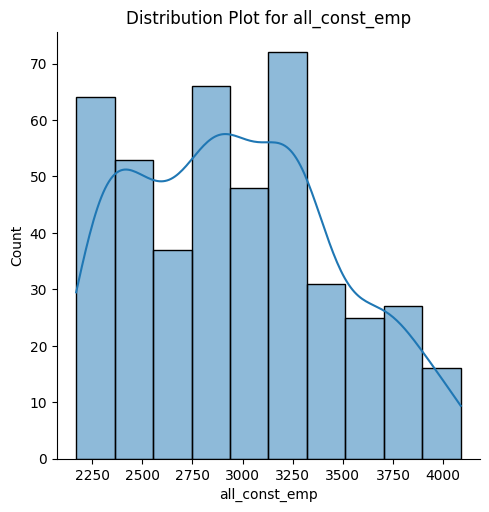

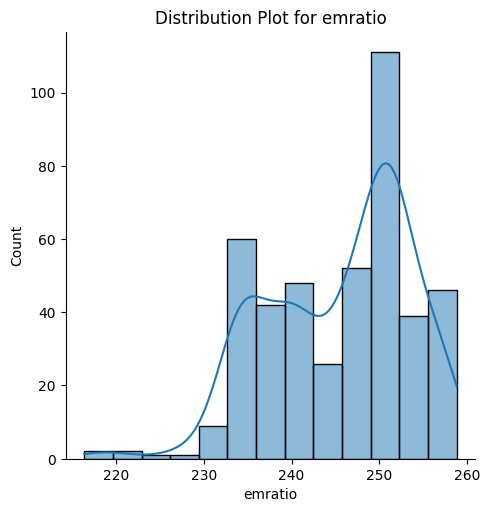

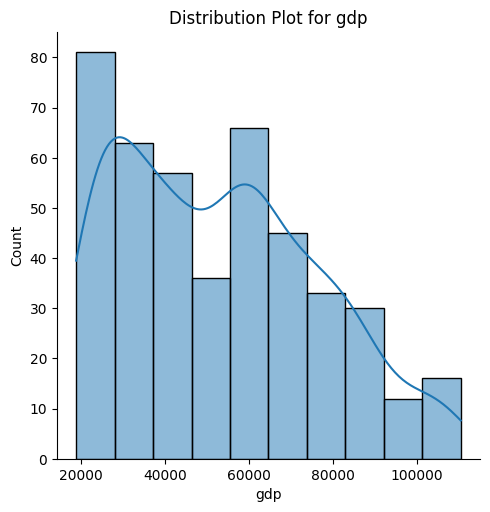

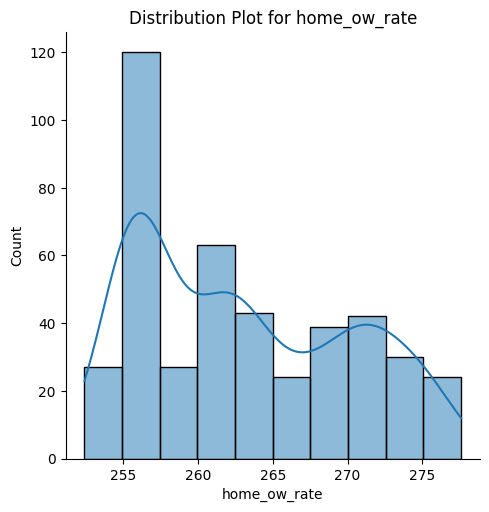

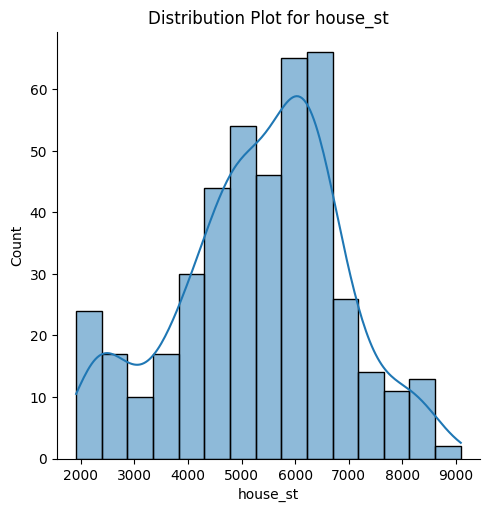

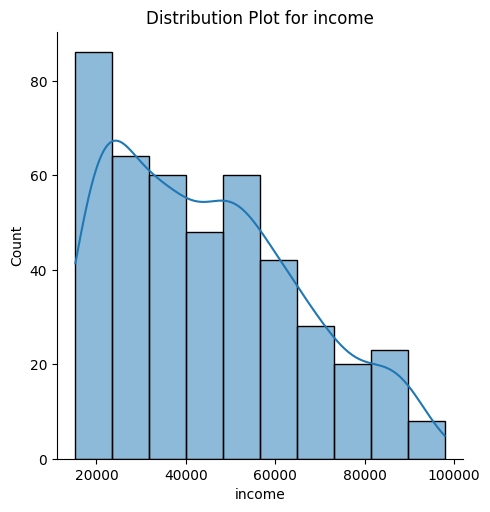

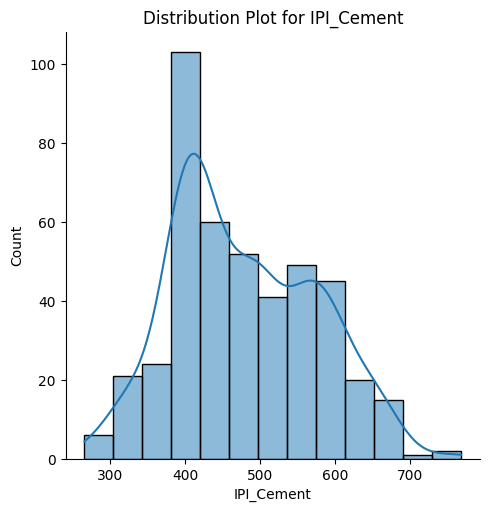

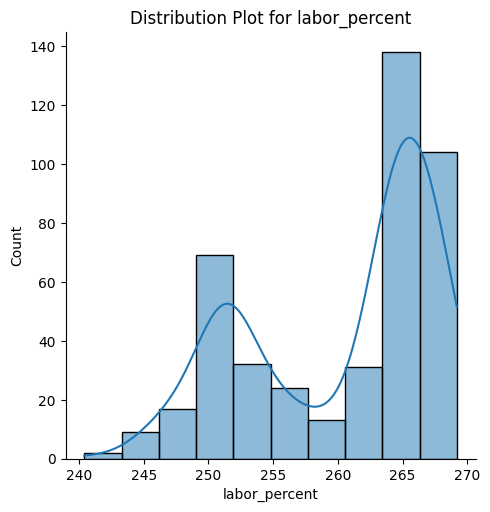

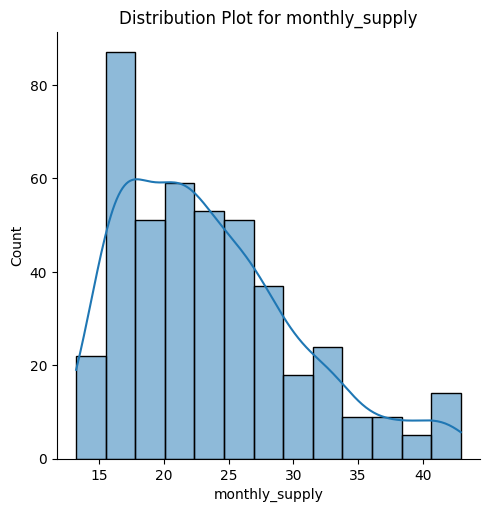

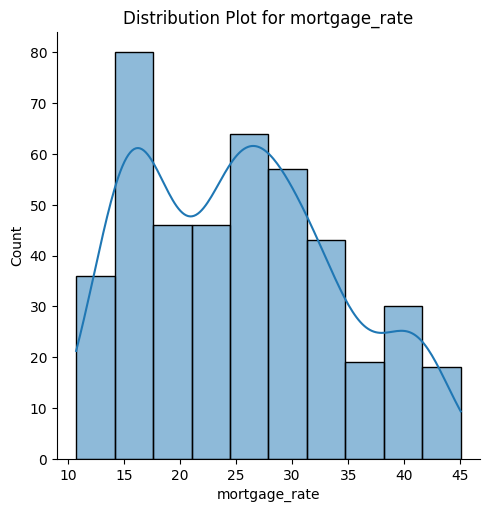

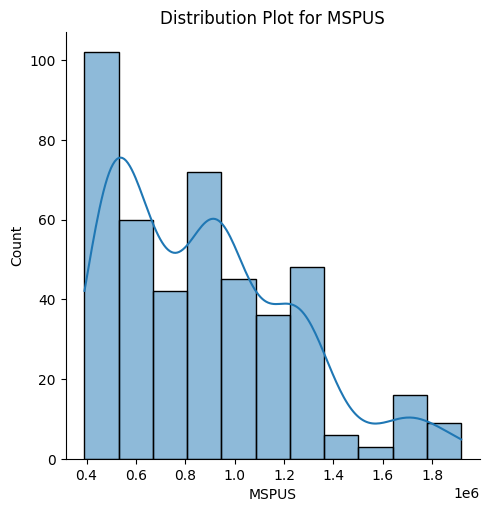

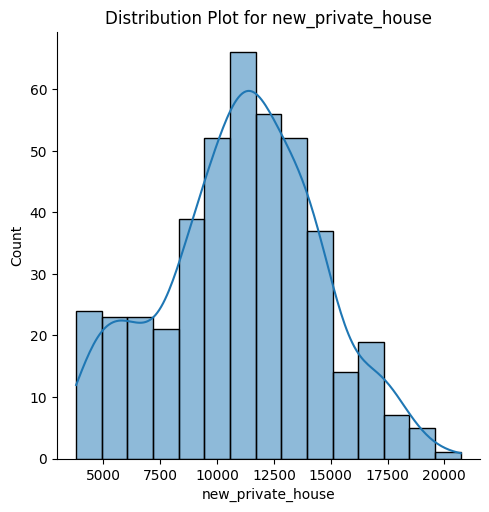

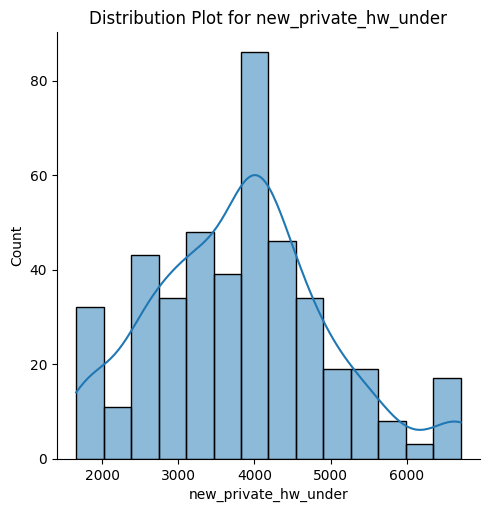

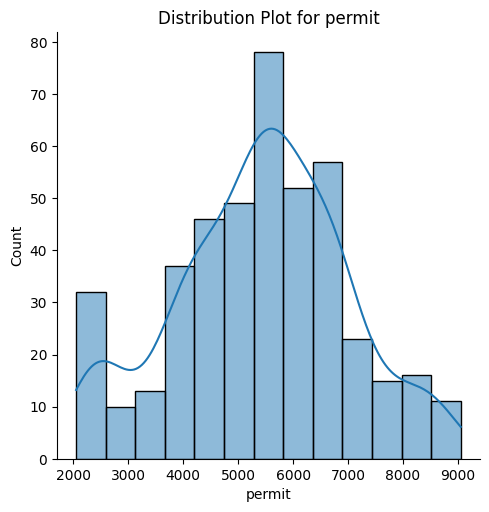

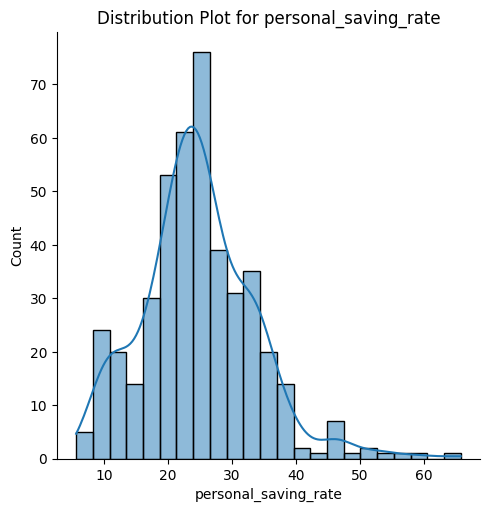

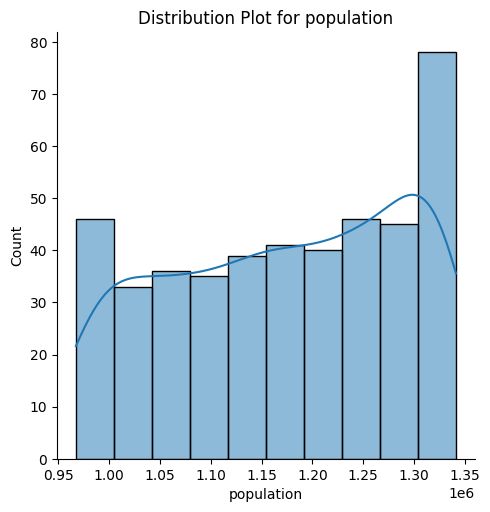

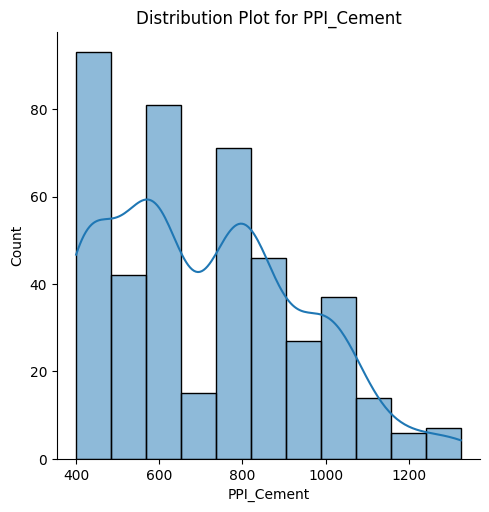

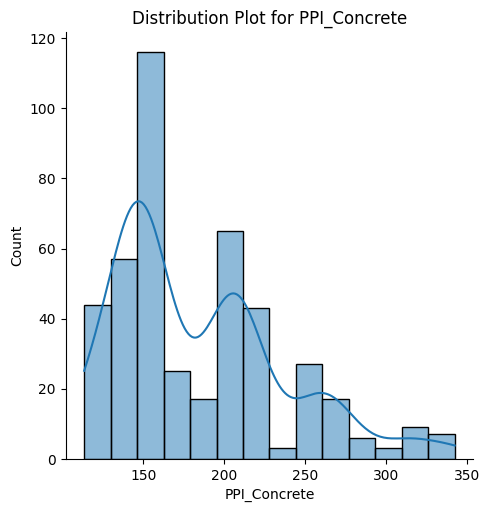

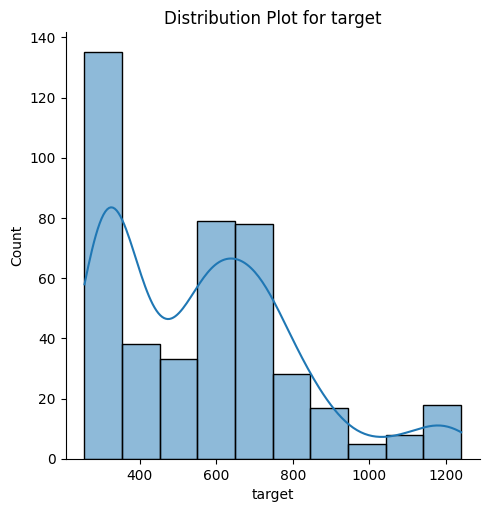

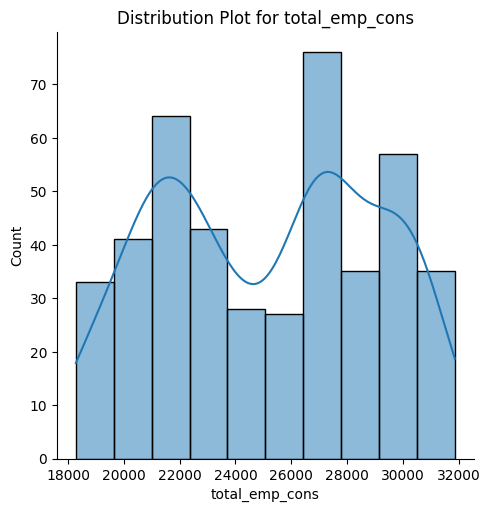

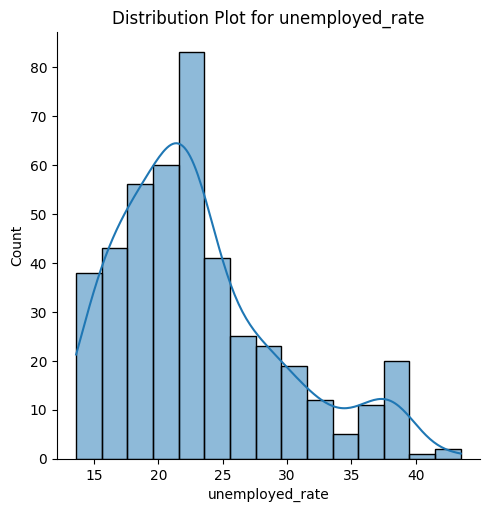

In [6]:
# Density plots for all numerical features
plt.figure(figsize=(12, 6))
for col in df_final.columns:
    sns.displot(data=df_final, x=col, kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()


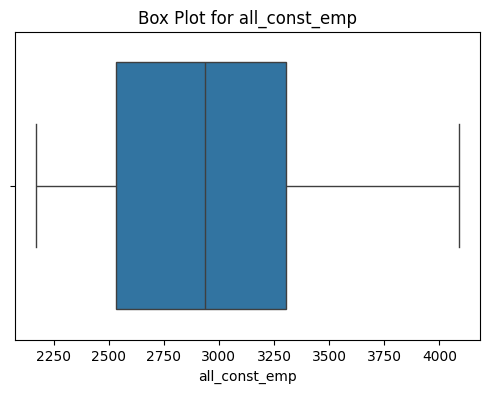

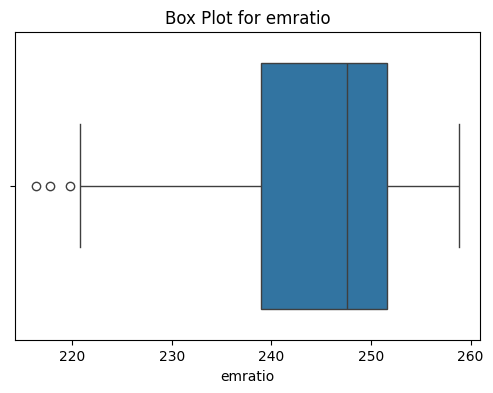

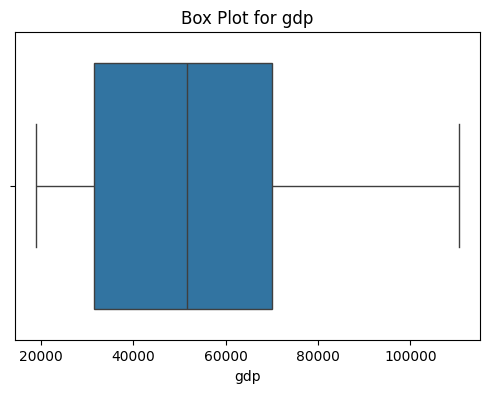

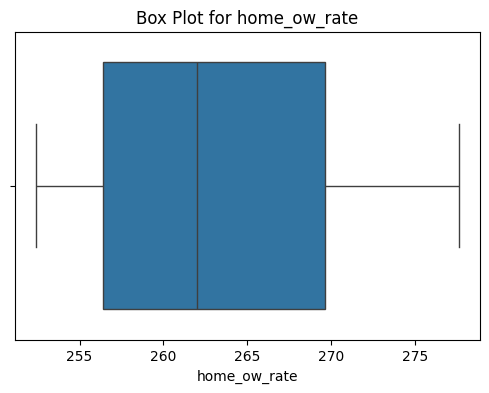

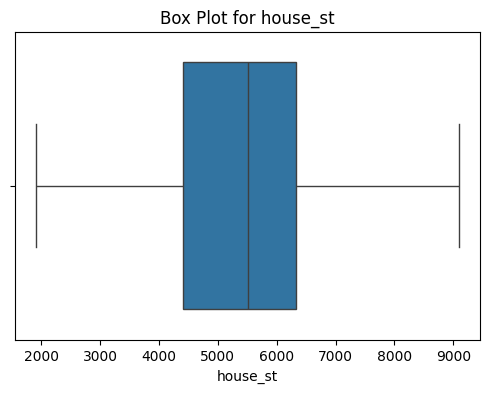

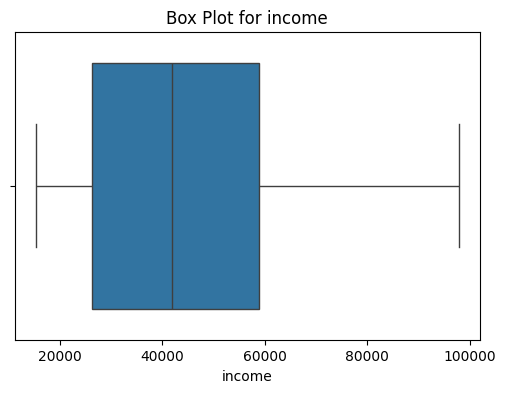

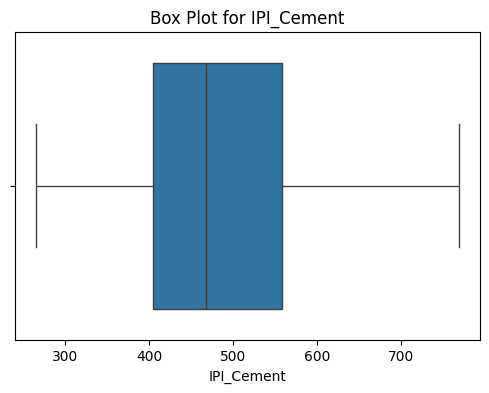

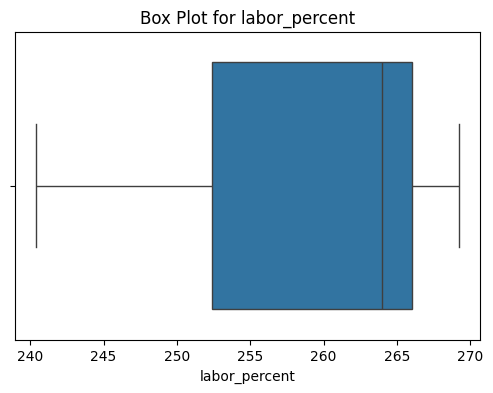

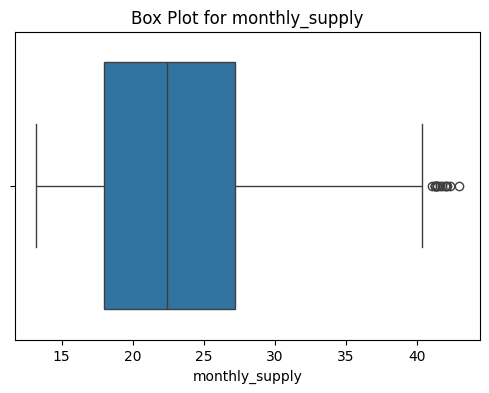

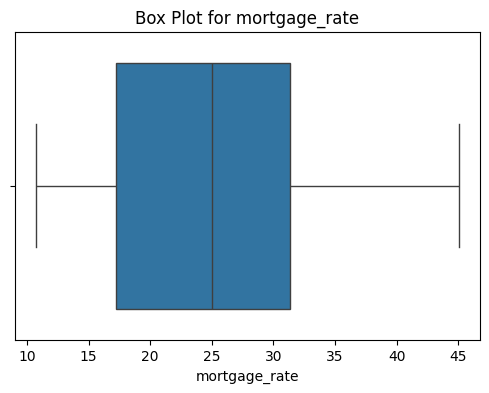

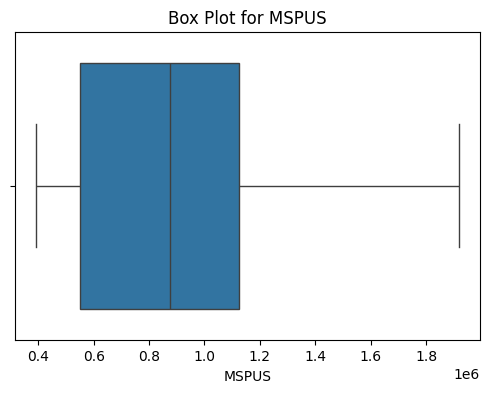

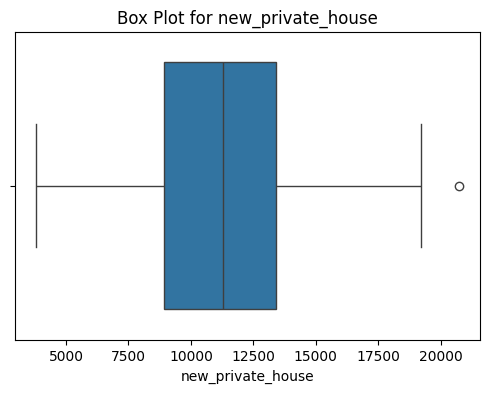

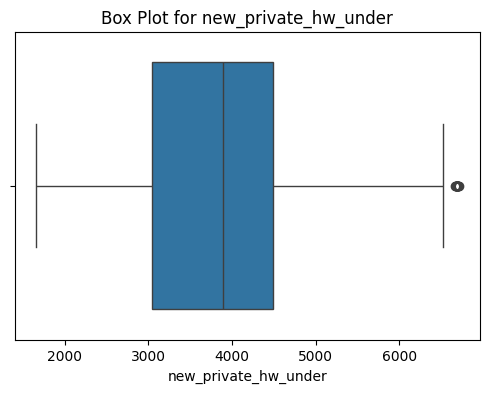

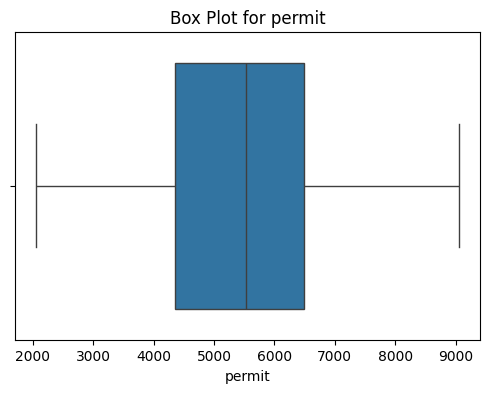

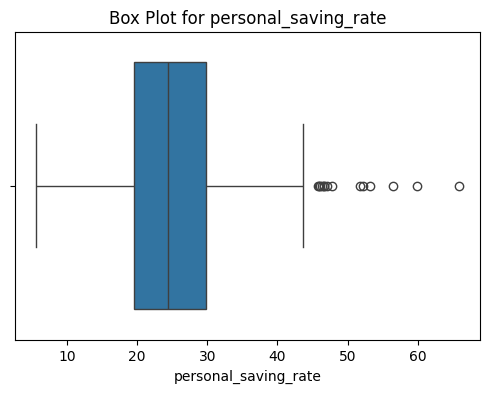

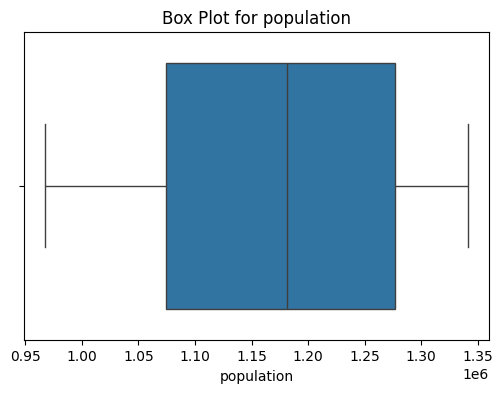

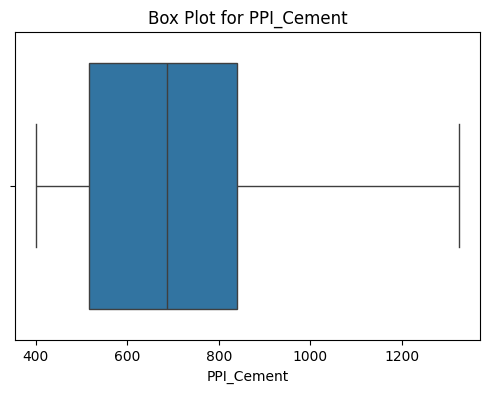

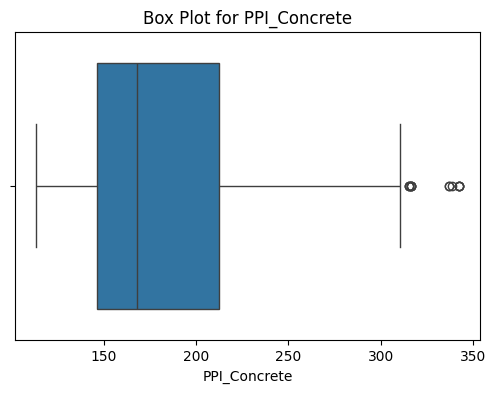

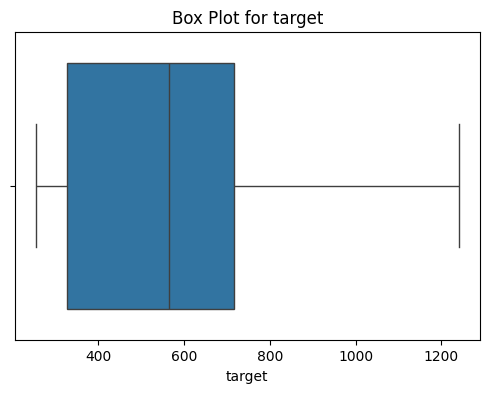

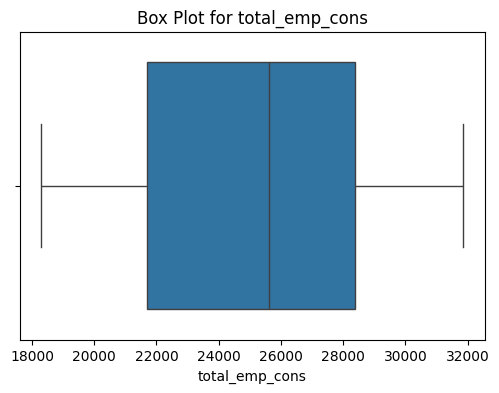

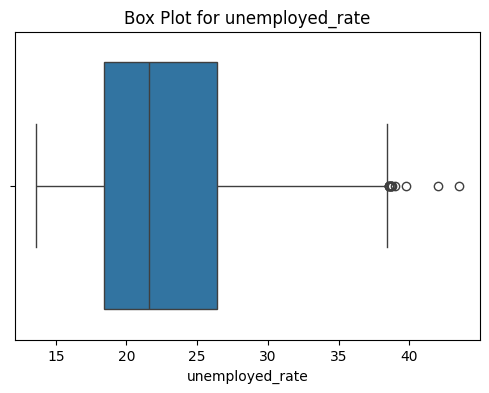

In [7]:
# Plotting boxplots for all numerical features to analyze outliers
for col in df_final.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_final, x=col)
    plt.xlabel(col)
    plt.title(f'Box Plot for {col}')
    plt.show()


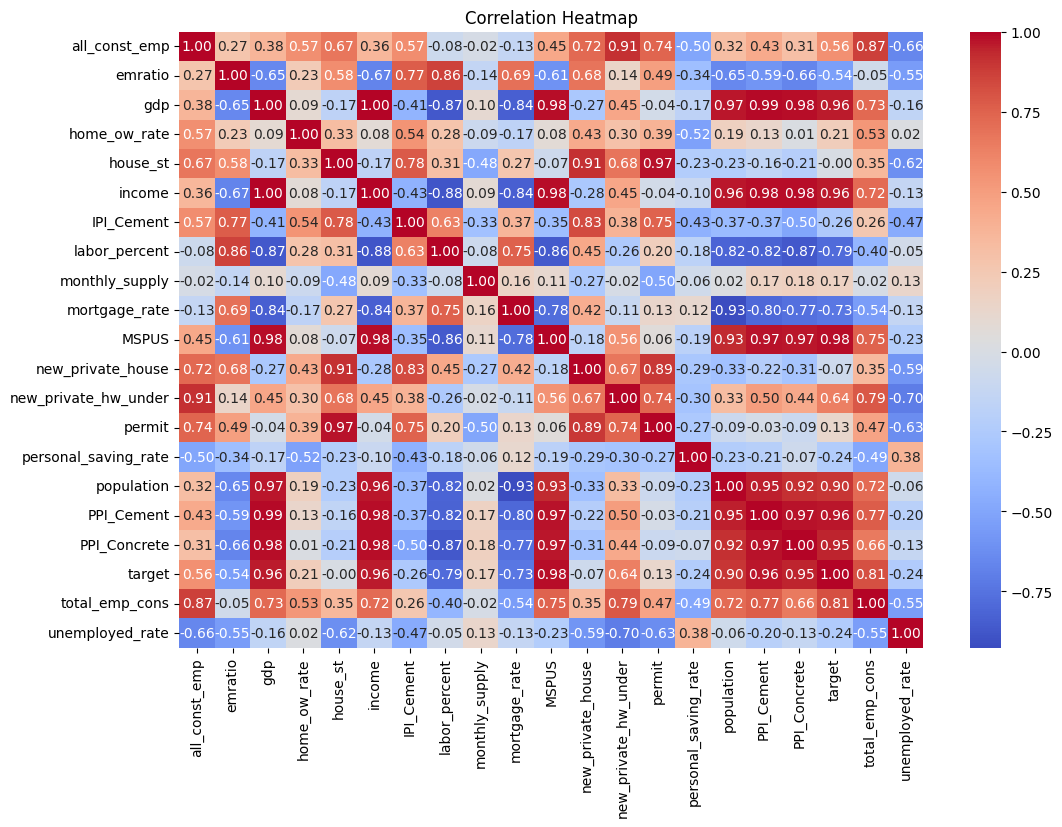

In [8]:
plt.figure(figsize=(12, 8))
corr_matrix = df_final.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Get the top 10 most correlated features (positive and negative)
top_corr_features = corr_matrix['target'].abs().sort_values(ascending=False).head(11).index
top_corr_features = top_corr_features[top_corr_features != 'target'] 

In [10]:
top_corr = corr_matrix.loc[top_corr_features, 'target']
print("Top Correlated Features with Target:")
print(top_corr)

Top Correlated Features with Target:
MSPUS                   0.980144
PPI_Cement              0.964074
gdp                     0.960633
income                  0.955608
PPI_Concrete            0.947084
population              0.896974
total_emp_cons          0.812130
labor_percent          -0.788313
mortgage_rate          -0.730709
new_private_hw_under    0.635696
Name: target, dtype: float64


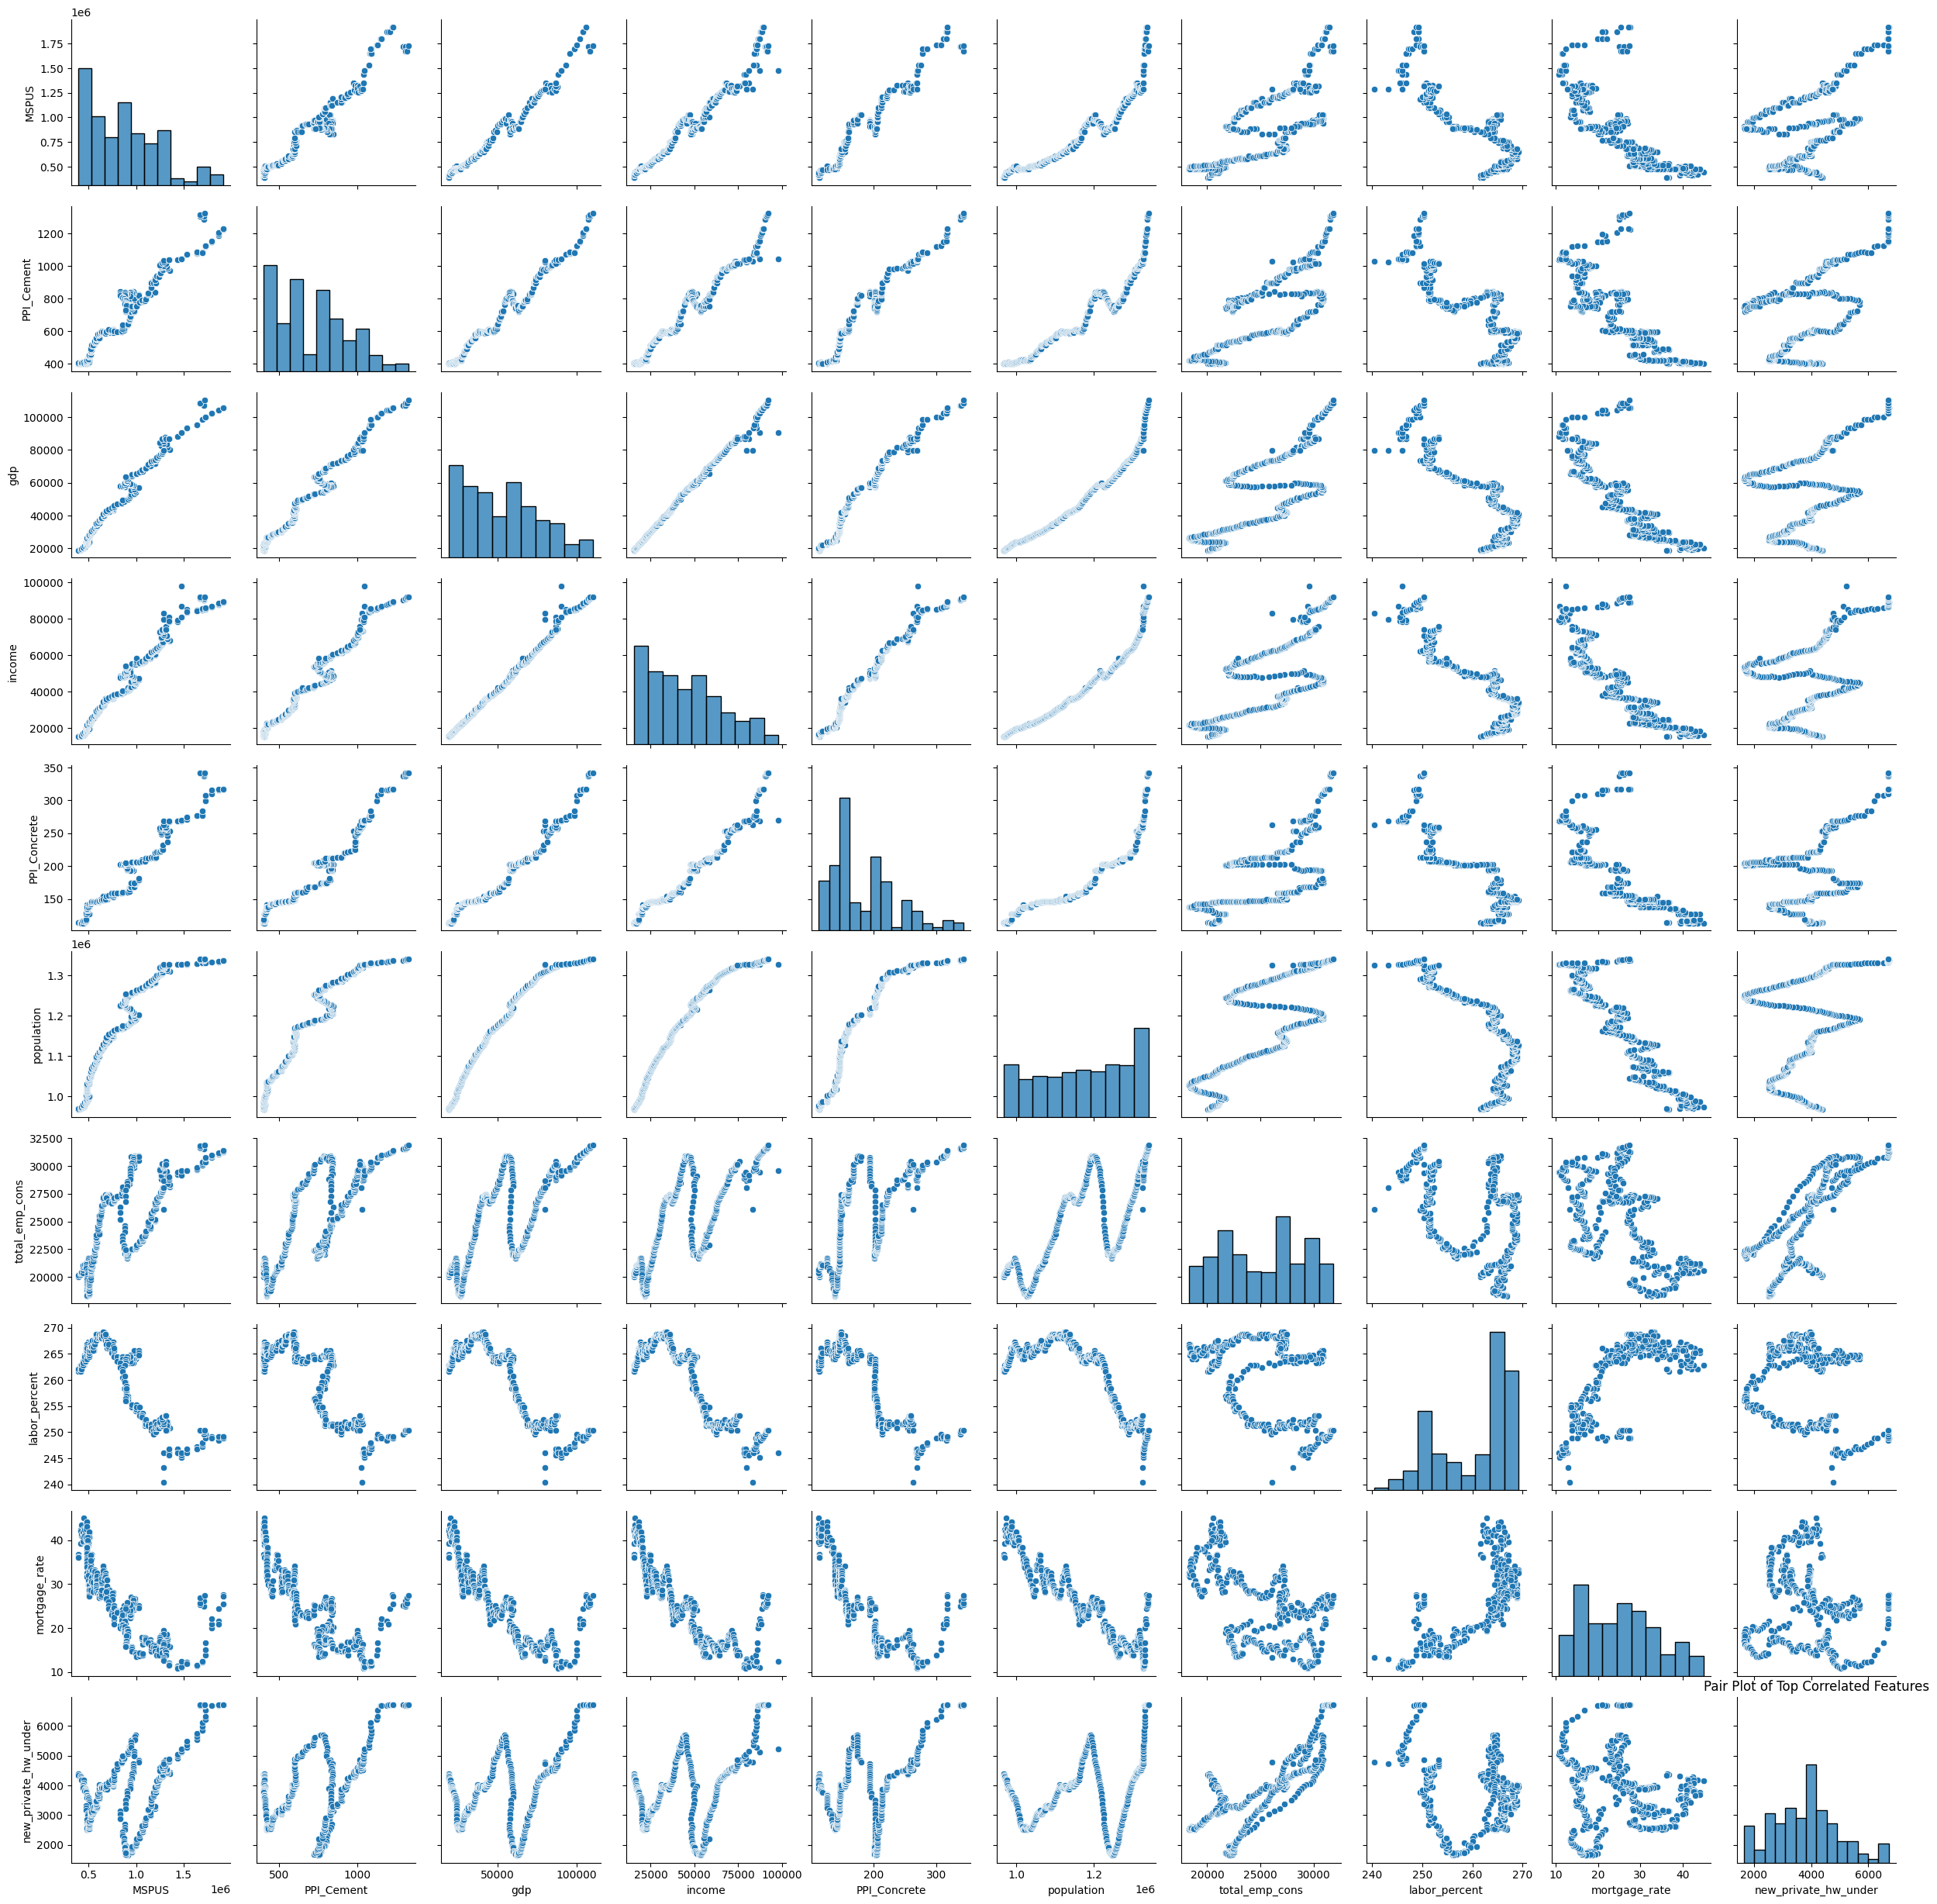

In [11]:
# Create a pair plot using only the top correlated features
sns.pairplot(df_final[top_corr_features])
plt.title("Pair Plot of Top Correlated Features")
plt.show()

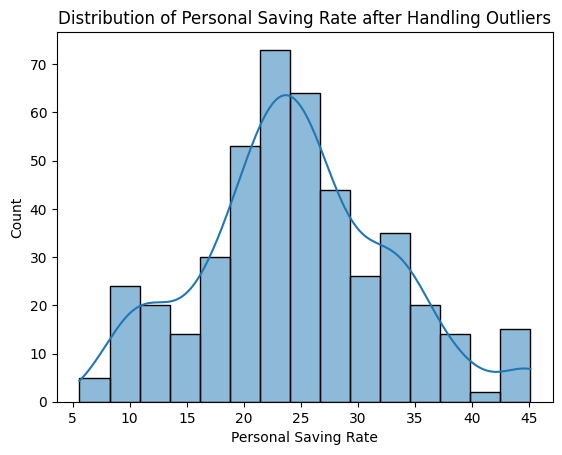

In [12]:
# Handling outliers and skewness
# Personal saving rate
q1 = df_final["personal_saving_rate"].quantile(0.25)
q3 = df_final["personal_saving_rate"].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
df_final.loc[df_final['personal_saving_rate'] > upper_bound, 'personal_saving_rate'] = upper_bound
sns.histplot(df_final['personal_saving_rate'], kde=True)
plt.title("Distribution of Personal Saving Rate after Handling Outliers")
plt.xlabel("Personal Saving Rate")
plt.ylabel("Count")
plt.show()

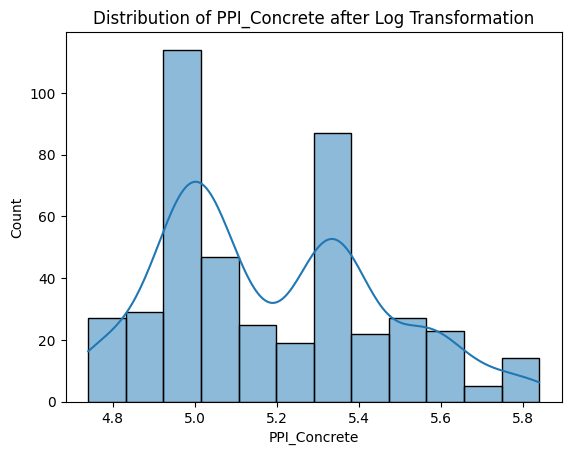

In [13]:
# PPI_Concrete
df_final['PPI_Concrete'] = np.log1p(df_final['PPI_Concrete'])
sns.histplot(df_final['PPI_Concrete'], kde=True)
plt.title("Distribution of PPI_Concrete after Log Transformation")
plt.xlabel("PPI_Concrete")
plt.ylabel("Count")
plt.show()

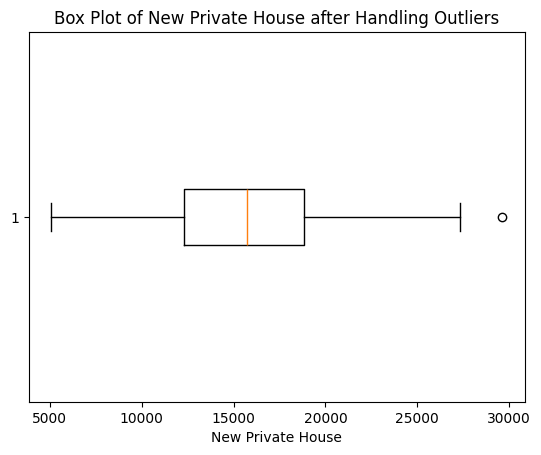

In [14]:
# New private house
transformed_data, lambda_value = stats.yeojohnson(df_final['new_private_house'])
df_final['new_private_house'] = transformed_data
     
plt.boxplot(df_final['new_private_house'], vert=False)
plt.xlabel('New Private House')
plt.title('Box Plot of New Private House after Handling Outliers')
plt.show()

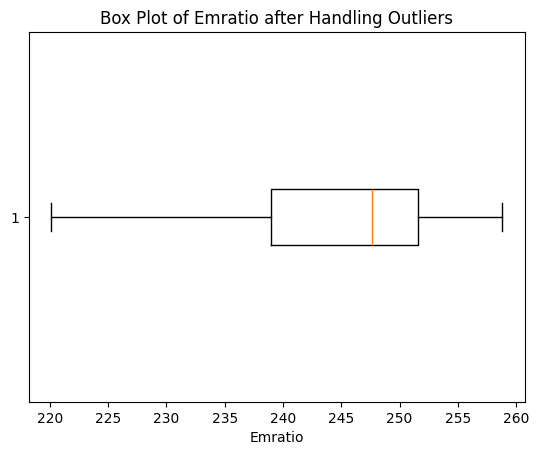

In [15]:
# Emratio
q1 = df_final["emratio"].quantile(0.25)
q3 = df_final["emratio"].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
df_final.loc[df_final['emratio'] < lower_bound, 'emratio'] = lower_bound
plt.boxplot(df_final['emratio'], vert=False)
plt.xlabel('Emratio')
plt.title('Box Plot of Emratio after Handling Outliers')
plt.show()

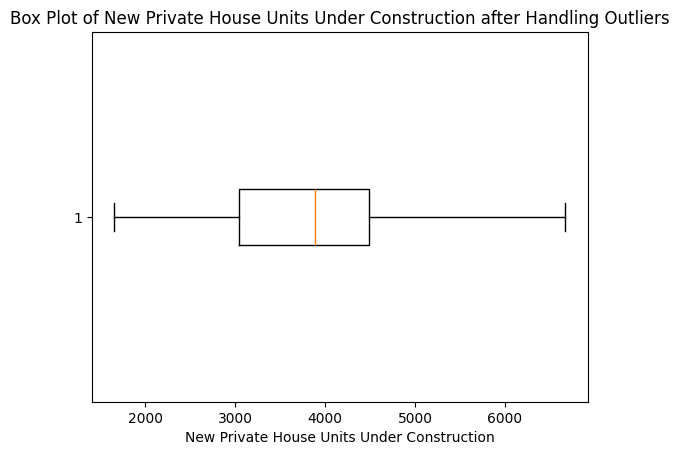

In [16]:
# New private house units under construction
q1 = df_final["new_private_hw_under"].quantile(0.25)
q3 = df_final["new_private_hw_under"].quantile(0.75)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
df_final.loc[df_final['new_private_hw_under'] > upper_bound, 'new_private_hw_under'] = upper_bound
plt.boxplot(df_final['new_private_hw_under'], vert=False)
plt.xlabel('New Private House Units Under Construction')
plt.title('Box Plot of New Private House Units Under Construction after Handling Outliers')
plt.show()

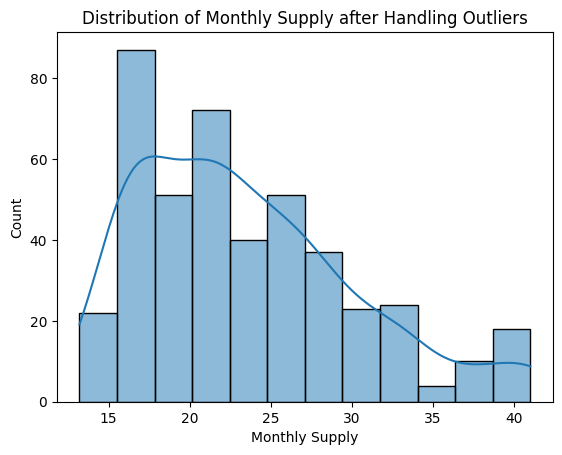

In [17]:
# Monthly supply
q1 = df_final["monthly_supply"].quantile(0.25)
q3 = df_final["monthly_supply"].quantile(0.75)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
df_final.loc[df_final['monthly_supply'] > upper_bound, 'monthly_supply'] = upper_bound
sns.histplot(df_final['monthly_supply'], kde=True)
plt.title("Distribution of Monthly Supply after Handling Outliers")
plt.xlabel("Monthly Supply")
plt.ylabel("Count")
plt.show()

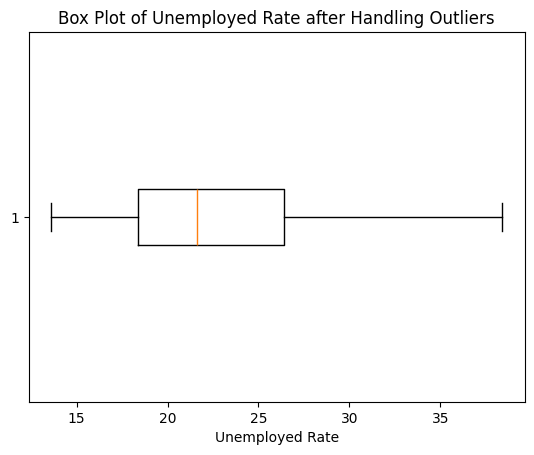

In [18]:
# Unemployed rate
q1 = df_final["unemployed_rate"].quantile(0.25)
q3 = df_final["unemployed_rate"].quantile(0.75)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
df_final.loc[df_final['unemployed_rate'] > upper_bound, 'unemployed_rate'] = upper_bound
plt.boxplot(df_final['unemployed_rate'], vert=False)
plt.xlabel('Unemployed Rate')
plt.title('Box Plot of Unemployed Rate after Handling Outliers')
plt.show()

In [19]:
# Checking multicollinearity
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_final.columns
    vif_data["VIF"] = [variance_inflation_factor(df_final.values, i) for i in range(df_final.shape[1])]
    print(vif_data)
except ModuleNotFoundError:
    print("Module 'statsmodels' not found. Please install it to check for multicollinearity.")



                 feature            VIF
0          all_const_emp    2195.537075
1                emratio  825302.088560
2                    gdp    4057.753727
3           home_ow_rate   29903.187713
4               house_st     531.042386
5                 income    2184.129709
6             IPI_Cement     347.982379
7          labor_percent  838681.230713
8         monthly_supply      83.314602
9          mortgage_rate     229.951181
10                 MSPUS    1179.230863
11     new_private_house     262.291413
12  new_private_hw_under     721.097221
13                permit     557.873128
14  personal_saving_rate      50.366427
15            population   21964.436334
16            PPI_Cement    1339.900587
17          PPI_Concrete   47287.153325
18                target    1400.486501
19        total_emp_cons    5226.926686
20       unemployed_rate    4028.028312


In [20]:
# Save the final dataframe
df_final.to_csv("CleanData/final.csv")